In [1]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data_dir = '/content/content/MyDrive/data/Unsupervised learning'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['Online Retail.xlsx',
 'data',
 'Untitled1.ipynb',
 '.ipynb_checkpoints',
 'Online Retail.csv']

# __Introduction to clustering__
- This section will cover unsupervised learning, a key concept in machine learning.  
- Unsupervised learning works without labeled data, focusing on uncovering hidden patterns in datasets.  
- Clustering groups data points based on inherent similarities to reveal meaningful structures.  
- Retail businesses use clustering to segment customers by preferences, improving marketing strategies.  
- Healthcare leverages clustering to group patients for tailored treatment plans and better insights.  
- Applications extend to fraud detection, image segmentation, and personalized content recommendations.  

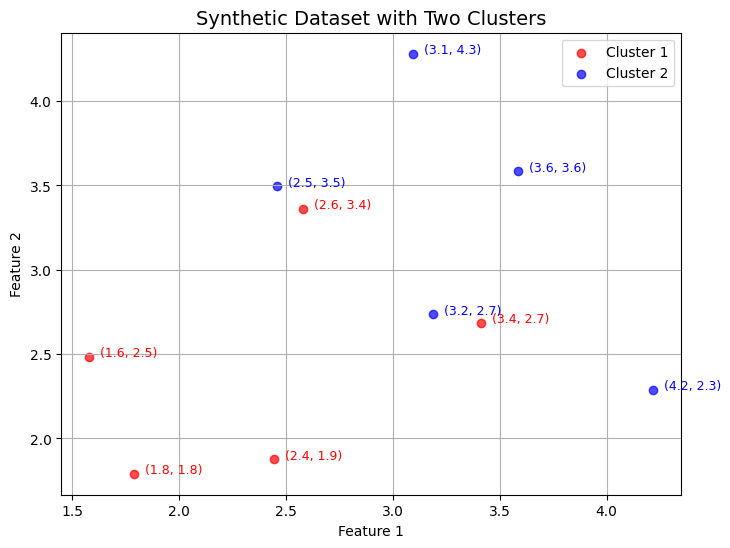

In [2]:
# Generate synthetic data with two clusters (5 points each)
np.random.seed(42)  # For reproducibility
cluster_1 = np.random.multivariate_normal([2, 2], [[0.8, 0], [0, 0.8]], size=5)
cluster_2 = np.random.multivariate_normal([4, 4], [[0.8, 0], [0, 0.8]], size=5)

# Combine the clusters into a single dataset
data = np.vstack((cluster_1, cluster_2))
labels = np.array([0] * 5 + [1] * 5)  # Labels to differentiate clusters

# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='Cluster 1', alpha=0.7)
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='blue', label='Cluster 2', alpha=0.7)

# Label each point with its coordinates
for point in cluster_1:
    plt.text(point[0] + 0.05, point[1], f"({point[0]:.1f}, {point[1]:.1f})", fontsize=9, color='red')
for point in cluster_2:
    plt.text(point[0] + 0.05, point[1], f"({point[0]:.1f}, {point[1]:.1f})", fontsize=9, color='blue')

# Add plot details
plt.title("Synthetic Dataset with Two Clusters", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# __K-Mean Clustering algorithm__

- Randomly select centroids as starting points for clustering, ensuring fewer centroids than data points.  
- Assign data points to the nearest centroid using squared Euclidean distance for efficiency.  
- Recalculate centroids by averaging the positions of points in each cluster.  
- Repeat assignments and centroid updates until the centroids stop moving significantly.  
- Use a threshold (epsilon) to prevent infinite loops and ensure optimal clustering convergence.  
- Eliminate unassigned centroids to streamline the clustering process and maintain active clusters.  


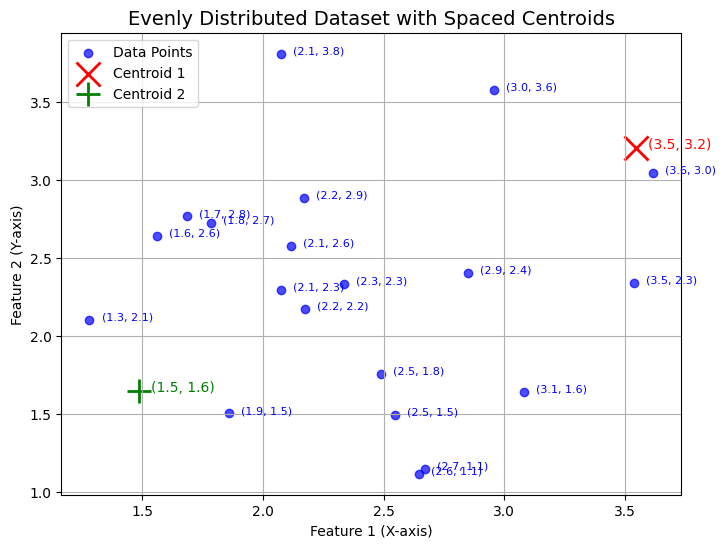

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a single synthetic dataset
np.random.seed(42)
data = np.random.multivariate_normal(
    mean=[2.5, 2.5], cov=[[0.5, 0], [0, 0.5]], size=20
)

# Randomly initialize centroids with a minimum distance
def initialize_centroids(data, min_distance):
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    y_min, y_max = data[:, 1].min(), data[:, 1].max()

    # Generate first centroid
    centroid_1 = [np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)]

    # Generate second centroid, ensuring it's far enough from the first
    while True:
        centroid_2 = [np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)]
        distance = np.sqrt((centroid_2[0] - centroid_1[0])**2 + (centroid_2[1] - centroid_1[1])**2)
        if distance >= min_distance:
            break

    return centroid_1, centroid_2

centroid_1, centroid_2 = initialize_centroids(data, min_distance=1.0)

# Plot the data points and centroids
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c="blue", label="Data Points", alpha=0.7)
plt.scatter(*centroid_1, c="red", marker="x", s=300, linewidths=2, label="Centroid 1")
plt.scatter(*centroid_2, c="green", marker="+", s=300, linewidths=2, label="Centroid 2")

# Annotate data points and centroids
for point in data:
    plt.text(point[0] + 0.05, point[1], f"({point[0]:.1f}, {point[1]:.1f})", fontsize=8, color="blue")
plt.text(centroid_1[0] + 0.05, centroid_1[1], f"({centroid_1[0]:.1f}, {centroid_1[1]:.1f})", fontsize=10, color="red")
plt.text(centroid_2[0] + 0.05, centroid_2[1], f"({centroid_2[0]:.1f}, {centroid_2[1]:.1f})", fontsize=10, color="green")

# Add plot details
plt.legend(loc="upper left")
plt.grid(True)
plt.title("Evenly Distributed Dataset with Spaced Centroids", fontsize=14)
plt.xlabel("Feature 1 (X-axis)")
plt.ylabel("Feature 2 (Y-axis)")
plt.show()

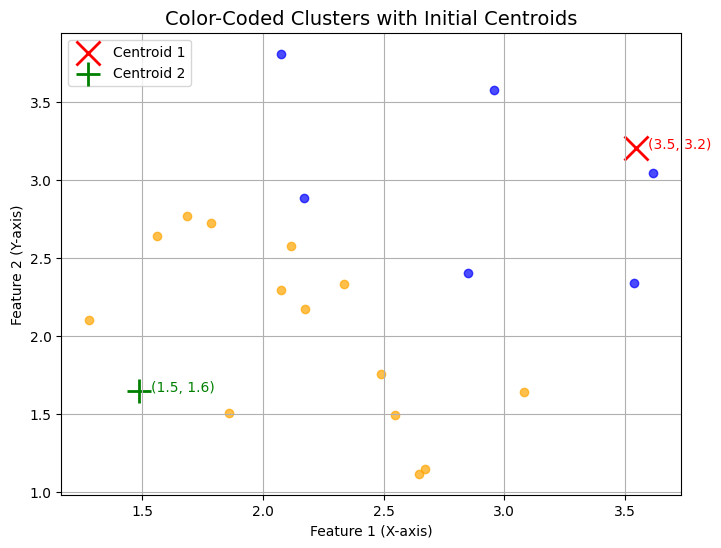

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a single synthetic dataset
np.random.seed(42)
data = np.random.multivariate_normal(
    mean=[2.5, 2.5], cov=[[0.5, 0], [0, 0.5]], size=20
)

# Randomly initialize centroids with a minimum distance
def initialize_centroids(data, min_distance):
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    y_min, y_max = data[:, 1].min(), data[:, 1].max()

    # Generate first centroid
    centroid_1 = [np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)]

    # Generate second centroid, ensuring it's far enough from the first
    while True:
        centroid_2 = [np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)]
        # Use squared distance directly to avoid unnecessary square root
        distance = (centroid_2[0] - centroid_1[0])**2 + (centroid_2[1] - centroid_1[1])**2
        if distance >= min_distance**2:  # Compare with squared min_distance
            break

    return centroid_1, centroid_2

centroid_1, centroid_2 = initialize_centroids(data, min_distance=1.0)

# Assign points to the nearest centroid and color-code them
def assign_clusters(data, centroid_1, centroid_2):
    clusters = []
    for point in data:
        dist_to_centroid_1 = (point[0] - centroid_1[0])**2 + (point[1] - centroid_1[1])**2
        dist_to_centroid_2 = (point[0] - centroid_2[0])**2 + (point[1] - centroid_2[1])**2
        if dist_to_centroid_1 < dist_to_centroid_2:
            clusters.append(0)  # Assign to cluster 1
        else:
            clusters.append(1)  # Assign to cluster 2
    return np.array(clusters)

clusters = assign_clusters(data, centroid_1, centroid_2)

# Plot the data points and centroids
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange']
for i, point in enumerate(data):
    plt.scatter(point[0], point[1], c=colors[clusters[i]], alpha=0.7)
plt.scatter(*centroid_1, c="red", marker="x", s=300, linewidths=2, label="Centroid 1")
plt.scatter(*centroid_2, c="green", marker="+", s=300, linewidths=2, label="Centroid 2")

# Annotate centroids
plt.text(centroid_1[0] + 0.05, centroid_1[1], f"({centroid_1[0]:.1f}, {centroid_1[1]:.1f})", fontsize=10, color="red")
plt.text(centroid_2[0] + 0.05, centroid_2[1], f"({centroid_2[0]:.1f}, {centroid_2[1]:.1f})", fontsize=10, color="green")

# Add plot details
plt.legend(loc="upper left")
plt.grid(True)
plt.title("Color-Coded Clusters with Initial Centroids", fontsize=14)
plt.xlabel("Feature 1 (X-axis)")
plt.ylabel("Feature 2 (Y-axis)")
plt.show()

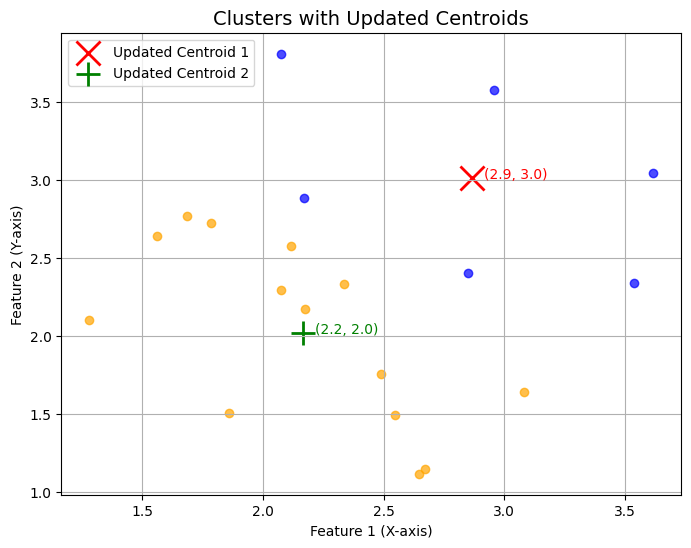

In [5]:
# Calculate new centers based on cluster assignments
def calculate_new_centers(data, clusters):
    cluster_1_points = data[clusters == 0]  # Points in cluster 1
    cluster_2_points = data[clusters == 1]  # Points in cluster 2

    new_centroid_1 = cluster_1_points.mean(axis=0)
    new_centroid_2 = cluster_2_points.mean(axis=0)

    return new_centroid_1, new_centroid_2

# Calculate new centroids
new_centroid_1, new_centroid_2 = calculate_new_centers(data, clusters)

# Plot the data points and updated centroids
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange']
for i, point in enumerate(data):
    plt.scatter(point[0], point[1], c=colors[clusters[i]], alpha=0.7)  # No change in cluster point colors
plt.scatter(*new_centroid_1, c="red", marker="x", s=300, linewidths=2, label="Updated Centroid 1")  # Red for Centroid 1
plt.scatter(*new_centroid_2, c="green", marker="+", s=300, linewidths=2, label="Updated Centroid 2")  # Green for Centroid 2

# Annotate updated centroids
plt.text(new_centroid_1[0] + 0.05, new_centroid_1[1], f"({new_centroid_1[0]:.1f}, {new_centroid_1[1]:.1f})", fontsize=10, color="red")
plt.text(new_centroid_2[0] + 0.05, new_centroid_2[1], f"({new_centroid_2[0]:.1f}, {new_centroid_2[1]:.1f})", fontsize=10, color="green")

# Add plot details
plt.legend(loc="upper left")
plt.grid(True)
plt.title("Clusters with Updated Centroids", fontsize=14)
plt.xlabel("Feature 1 (X-axis)")
plt.ylabel("Feature 2 (Y-axis)")
plt.show()

# __K-Mean Clustering algorithm formula__
- Each data point has coordinates and is assigned to its nearest cluster centroid.  
- Centroids represent cluster centers, calculated as the average position of assigned data points.  
- Squared Euclidean distance determines proximity, minimizing computational effort while clustering data points.  
- Iterative updates refine centroids, stopping when changes are below a small threshold value (epsilon).  



## __Algorithm Explanation__

* $x^{(i)}$: Coordinate of the $i$-th data point (superscript represents the row/item index).
  * ${i = 1, 2, 3, ..., m}$
  * Example Data Points $(x^{(i)})$
    * $x^{(1)} = (1.2, 3.4) \quad \text{(Coordinates of the first data point)}$
    * $x^{(2)} = (4.5, 1.8) \quad \text{(Coordinates of the second data point)}$
* $C_k$: Coordinate of the centroid for cluster $k$, where $k$ is the index of the cluster.
  * Example Centroids (C_k)
    * $C_1 = (2.0, 3.5) \quad \text{(Coordinates of the centroid for cluster 1)}$
    * $C_2 = (4.8, 1.2) \quad \text{(Coordinates of the centroid for cluster 2)}$
    * ${k = 1, 2, 3, ..., m - 1}$
* $c^{(i)}$: Cluster assignment for data point $x^{(i)}$, indicating the index of the nearest centroid.
 * Example Cluster Assignments $(c^{(i)})$
    * $c^{(1)} = 1 \quad \text{(Data point $x^{(1)}$ is assigned to cluster 1, nearest to centroid $C_1$)}$
    * $c^{(2)} = 2 \quad \text{(Data point $x^{(2)}$ is assigned to cluster 2, nearest to centroid $C_2$)}$
    * $c^{(3)} = 1 \quad \text{(Data point $x^{(3)}$ is assigned to cluster 1, nearest to centroid $C_1$)}$
    * $c^{(4)} = 2 \quad \text{(Data point $x^{(4)}$ is assigned to cluster 2, nearest to centroid $C_2$)}$
* $C_{c^{(i)}}$: Coordinate of the centroid for the cluster to which $x^{(i)}$ belongs.
  * It basecailly combines two terms $C_k$ and $c^{(i)}$
  * It shows the coordinate of the centroid (center point) for a specific data point, based on its cluster assignment.
  * Example Centroid Mapping $(C_{c^{(i)}})$:
    * $C_{c^{(1)}} = C_1 = (2.0, 3.5) \quad \text{(Centroid coordinates for data point } x^{(1)}\text{)}$
    * $C_{c^{(2)}} = C_2 = (4.8, 1.2) \quad \text{(Centroid coordinates for data point } x^{(2)}\text{)}$
    * $C_{c^{(3)}} = C_1 = (2.0, 3.5) \quad \text{(Centroid coordinates for data point } x^{(3)}\text{)}$
    * $C_{c^{(4)}} = C_2 = (4.8, 1.2) \quad \text{(Centroid coordinates for data point } x^{(4)}\text{)}$
* Squared Euclidean distance  using Norm for a single point
  * $D(x^{(i)}, C_k) = \| x^{(i)} - C_k \|^2$
* Cluster Assignment to a data point
  * $c^{(i)} = \arg \min_k \, \left\| x_i - C_k \right\|^2$
* __Cost Function__ called __SSD__ (Sum of square of distance) or __Distortion function__
  * $J(c^{(1)}, ..., c^{(m)}, C_1, ..., C_K) = \frac{1}{m} \sum_{i=1}^{m} \| x^{(i)} - C_{c^{(i)}} \|^2$
* Centroid Update
  * $C_k = \frac{1}{N_k} \sum_{x_i \in \text{Cluster}_k} x_i$
* Stopping Criteria
  * $|C_k^{(new)} - C_k^{(old)}| < \epsilon$
  * Where $\epsilon$ is a small threshold value

# __Data Preparation for clustering__
- **Dataset Preparation:** The UC Irvine dataset is downloaded and stored in the unsupervised learning folder.  
  * https://archive.ics.uci.edu/dataset/352/online+retail
- **Data Optimization:** Converting Excel data to CSV format significantly reduces loading time and improves efficiency.  
- **Feature Engineering:** Important metrics like Total Annual Value, Frequency, and Recency are calculated for clustering.  
- **Outlier Removal:** Interquartile Range (IQR) method is applied to eliminate extreme values affecting clustering accuracy.  



In [6]:
%%time
df_excel = pd.read_excel('Online Retail.xlsx')

CPU times: user 1min 1s, sys: 546 ms, total: 1min 1s
Wall time: 1min 3s


In [7]:
%%time
df_excel.to_csv('Online Retail.csv', index=False)

CPU times: user 4.37 s, sys: 72.6 ms, total: 4.44 s
Wall time: 5.9 s


In [8]:
%%time
df_data = pd.read_csv('Online Retail.csv')

CPU times: user 694 ms, sys: 111 ms, total: 806 ms
Wall time: 874 ms


In [9]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# Show columns, data types, and nulls to prepare hygiene activities
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
# Show descriptive statistics for quantitative columns
df_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# Show descriptive statistics for object columns
df_data.describe(include='O')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


In [13]:
df_data.shape

(541909, 8)

In [14]:
df_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [15]:
df_data.dropna(subset=['CustomerID'], inplace=True)
df_data.shape

(406829, 8)

In [16]:
df_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [17]:
df_data.nlargest(20, ['Quantity'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom


In [18]:
# Check for quantities less than zero
print(f"Total values with return items {df_data[df_data['Quantity'] <= 0]['Quantity'].count()}")
df_data[df_data["Quantity"] <= 0].head(10)

Total values with return items 8905


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [19]:
# Dropping off quantities below 0
df_data.drop(df_data[df_data['Quantity']<=0].index, inplace=True)
df_data[df_data["Quantity"] <= 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [20]:
# Checking unit price below 0
df_data[df_data["UnitPrice"] <= 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


In [21]:
# Dropping off unit prices below 0
df_data.drop(df_data[df_data['UnitPrice']<=0].index, inplace=True)
df_data[df_data['UnitPrice'] <=0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
# Checking for missing values
df_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [24]:
# Dropping off missing values based upon CustomerID
df_data.dropna(subset='CustomerID', inplace=True)
df_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [25]:
# Checking data shape
df_data.shape

(397884, 8)

In [26]:
# Check date range for Invoice Dates
df_data['InvoiceDate'] = pd.to_datetime(df_data['InvoiceDate']) #change Invoice date from object to datetime format
df_data['InvoiceDate'] = df_data['InvoiceDate'].dt.date
print(df_data['InvoiceDate'].min())
print(df_data['InvoiceDate'].max())

2010-12-01
2011-12-09


In [27]:
# Selecting data on the basis of 12 month activity of the customers
one_year_data = df_data['InvoiceDate'].max() - timedelta(days=365) # Selecting only 1 year long data
df_data.drop(df_data[df_data['InvoiceDate'] < one_year_data].index, inplace=True) # Dropping hours from Dates data
df_data.shape

(385129, 8)

In [28]:
df_data['TotalValue'] = df_data['Quantity'] * df_data['UnitPrice']

## __Feature Engineering__

In [29]:
# Creating a consolidated dataframe grouped by Customer ID
df_train = df_data.groupby(by='CustomerID', as_index=False).agg(
    TAV = ('TotalValue', 'sum'),
    Frequency = ('InvoiceNo', 'nunique'),
    LastInvoiceDate = ('InvoiceDate', 'max'))
df_train.head()

,CustomerID,TAV,Frequency,LastInvoiceDate
0,12346.0,77183.60,1,2011-01-18
1,12347.0,3598.21,6,2011-12-07
2,12348.0,1797.24,4,2011-09-25
3,12349.0,1757.55,1,2011-11-21
4,12350.0,334.40,1,2011-02-02


In [30]:
# Changing data type to datetime for further processing
df_train['LastInvoiceDate'] = pd.to_datetime(df_train['LastInvoiceDate'])
# Calculating days since last activity
df_train['recency'] = (df_train['LastInvoiceDate'].max() - df_train['LastInvoiceDate']).dt.days
df_train.head()

,CustomerID,TAV,Frequency,LastInvoiceDate,recency
0,12346.0,77183.60,1,2011-01-18,325
1,12347.0,3598.21,6,2011-12-07,2
2,12348.0,1797.24,4,2011-09-25,75
3,12349.0,1757.55,1,2011-11-21,18
4,12350.0,334.40,1,2011-02-02,310


In [31]:
df_train.to_csv('df_train.csv', index=False)

## __Outlier managment__

Text(0.5, 0, 'recency')

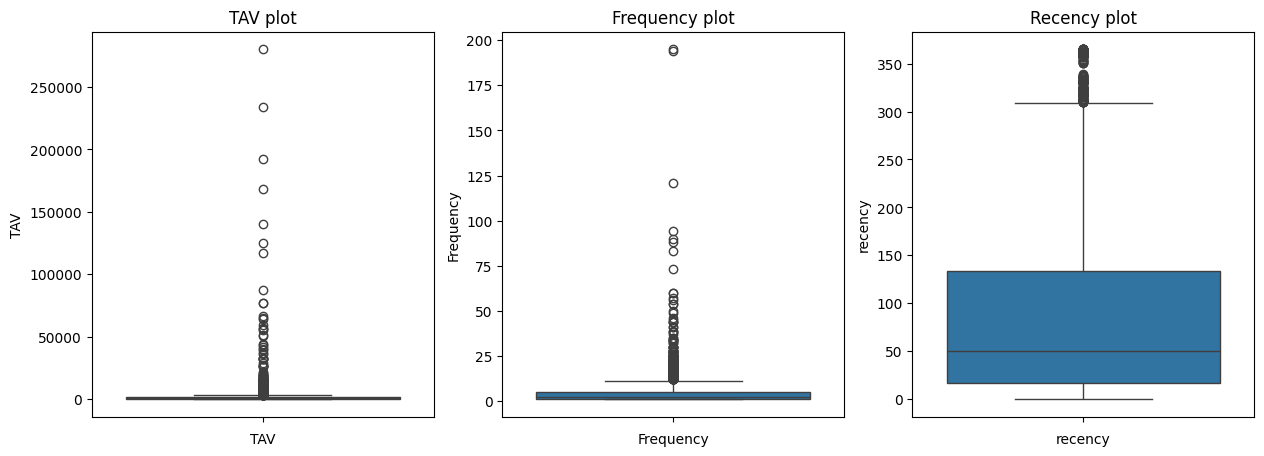

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=df_train['TAV'])
plt.title('TAV plot')
plt.xlabel('TAV')

plt.subplot(1,3,2)
sns.boxplot(data=df_train['Frequency'])
plt.title('Frequency plot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data=df_train['recency'])
plt.title('Recency plot')
plt.xlabel('recency')

In [33]:
#Calculating Inter Quartile range for Total annual value, frequency and recency
tav_iqr = df_train['TAV'].quantile(.75) - df_train['TAV'].quantile(.25)
freq_iqr = df_train['Frequency'].quantile(.75) - df_train['Frequency'].quantile(.25)
rec_iqr = df_train['recency'].quantile(.75) - df_train['recency'].quantile(.25)

print(f'{tav_iqr = }\n{freq_iqr = }\n{rec_iqr = }')

tav_iqr = np.float64(1336.35)
freq_iqr = np.float64(4.0)
rec_iqr = np.float64(117.0)


In [34]:
df_tav_outlier = df_train[(df_train['TAV'] > (df_train['TAV'].quantile(.75) + 1.5* tav_iqr)) |
                    (df_train['TAV'] < (df_train['TAV'].quantile(.25) - 1.5* tav_iqr))].copy()
df_freq_outlier = df_train[(df_train['Frequency'] > (df_train['Frequency'].quantile(.75) + 1.5* freq_iqr)) |
                    (df_train['Frequency'] < (df_train['Frequency'].quantile(.25) - 1.5* freq_iqr))].copy()
df_rec_outlier = df_train[(df_train['recency'] > (df_train['recency'].quantile(.75) + 1.5* rec_iqr)) |
                    (df_train['recency'] < (df_train['recency'].quantile(.25) - 1.5* rec_iqr))].copy()

In [35]:
print(f'{df_tav_outlier.shape = } \n {df_freq_outlier.shape = } \n {df_rec_outlier.shape = }')

df_tav_outlier.shape = (413, 5) 
 df_freq_outlier.shape = (259, 5) 
 df_rec_outlier.shape = (167, 5)


In [36]:
# Created a dataframe for outliers
df_outlier = pd.concat([df_tav_outlier, df_freq_outlier, df_rec_outlier]).drop_duplicates(subset='CustomerID')

In [37]:
df_outlier.shape

(621, 5)

In [38]:
# Created a dataframe for all the values in normal range
df_non_outlier = df_train[~df_train['CustomerID'].isin(df_outlier['CustomerID'])].copy()

In [39]:
df_non_outlier.shape

(3653, 5)

In [40]:
df_train.shape[0] == df_outlier.shape[0] + df_non_outlier.shape[0]

True

In [41]:
df_outlier.sort_values('TAV', ascending=False).head()

,CustomerID,TAV,Frequency,LastInvoiceDate,recency
1671,14646.0,280206.02,73,2011-12-08,1
4140,18102.0,233736.93,57,2011-12-09,0
3679,17450.0,192521.95,44,2011-12-01,8
2970,16446.0,168472.50,2,2011-12-09,0
1858,14911.0,140359.03,194,2011-12-08,1


In [42]:
df_non_outlier.sort_values('TAV', ascending=False).head()

,CustomerID,TAV,Frequency,LastInvoiceDate,recency
3153,16712.0,3645.43,11,2011-11-30,9
796,13426.0,3641.32,10,2011-12-09,0
220,12619.0,3641.24,9,2011-11-23,16
2965,16440.0,3640.67,5,2011-12-02,7
767,13381.0,3639.31,6,2011-11-08,31


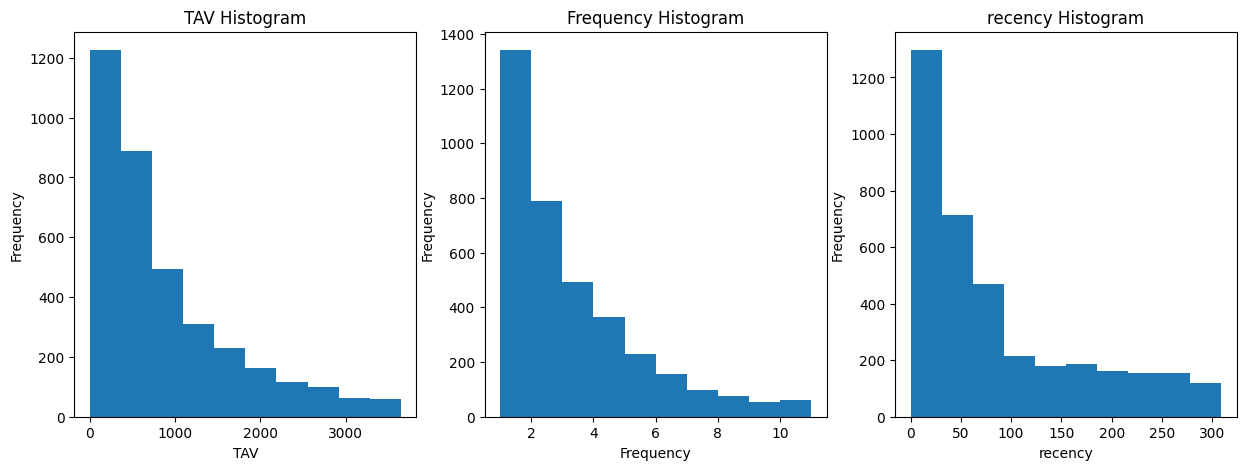

In [43]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
df_non_outlier['TAV'].plot(kind='hist')
plt.title('TAV Histogram')
plt.xlabel('TAV')

plt.subplot(1, 3, 2)
df_non_outlier['Frequency'].plot(kind='hist')
plt.title('Frequency Histogram')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
df_non_outlier['recency'].plot(kind='hist')
plt.title('recency Histogram')
plt.xlabel('recency');

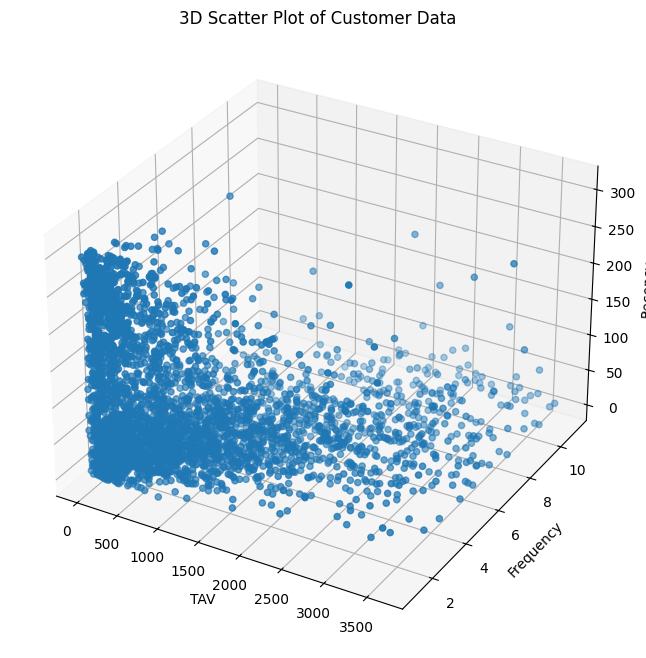

In [44]:
# Plot initial scatter based on the three features

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(df_non_outlier["TAV"], df_non_outlier["Frequency"], df_non_outlier["recency"])

ax.set_xlabel('TAV')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

# __K mean clustering with sklearn__
- KMeans inertia calculates the sum of squared distances to measure clustering effectiveness.
- Silhouette score evaluates how well-separated clusters are, ranging from minus 1 to plus 1.
- Higher silhouette scores indicate better-defined clusters, while negative values suggest misclassification.
- Scaling and feature selection (TAV, Frequency, Recency) help optimize data before clustering.
- K-values vs inertia plot shows a sharp drop until k equals 4 or 5 for clustering.
- Cluster number assignment in the non-outlier data frame allows further segmentation analysis.
- Violin plots highlight purchase behaviors, showing Cluster 3 has high-value customers around 2500.
- Recency graph analysis shows Cluster 1 may have inactive customers, while Cluster 2 is newly active.
- Bar charts illustrate customer distribution, aiding strategic targeting for different loyalty and engagement levels


In [45]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_non_outlier[['TAV', 'Frequency', 'recency']])

max_k = 12
k_values = range(2, max_k + 1)

inertia = []
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42, max_iter=2000)
    cluster_label = kmeans.fit_predict(scaled_data)
    sil_scores.append(silhouette_score(scaled_data, cluster_label))
    inertia.append(kmeans.inertia_)



CPU times: user 3.47 s, sys: 370 ms, total: 3.84 s
Wall time: 3.08 s


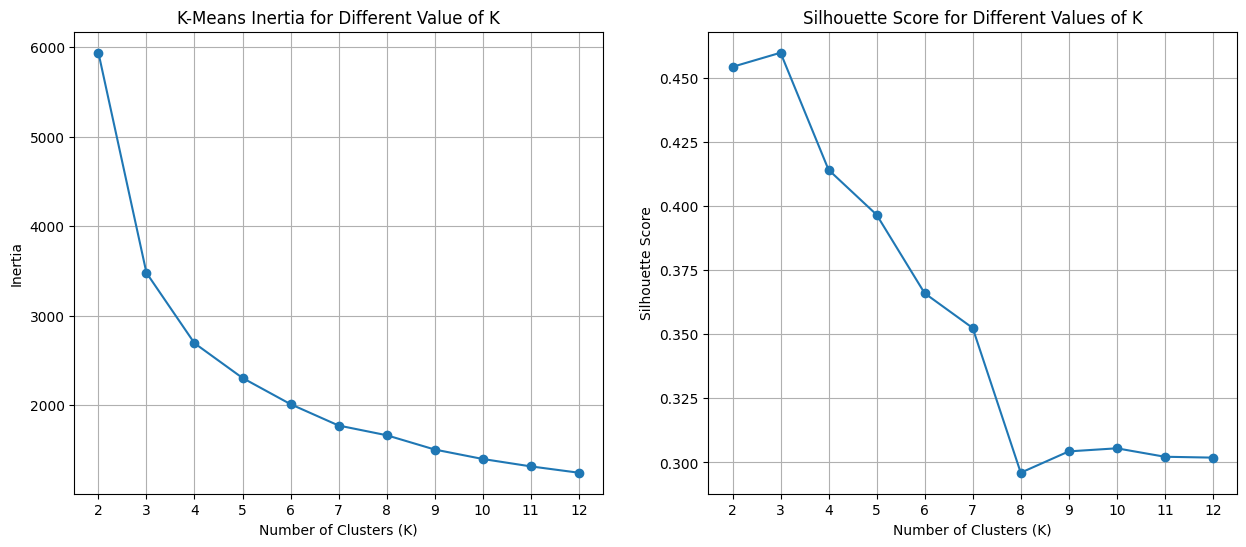

In [46]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('K-Means Inertia for Different Value of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

In [47]:
%%time
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42, max_iter=1000)
cluster_label = kmeans.fit_predict(scaled_data)
print(np.unique(cluster_label))
print(len(cluster_label))

[0 1 2 3]
3653
CPU times: user 9.11 ms, sys: 10 µs, total: 9.12 ms
Wall time: 8.75 ms


In [48]:
df_non_outlier['cluster'] = cluster_label
df_non_outlier.head()

,CustomerID,TAV,Frequency,LastInvoiceDate,recency,cluster
1,12347.0,3598.21,6,2011-12-07,2,3
2,12348.0,1797.24,4,2011-09-25,75,0
3,12349.0,1757.55,1,2011-11-21,18,0
5,12352.0,2506.04,8,2011-11-03,36,3
6,12353.0,89.00,1,2011-05-19,204,1


In [49]:
df_non_outlier.groupby('cluster')['TAV'].agg(['min', 'median', 'max'])

,min,median,max
cluster,,,
0,70.02,1231.310,3528.34
1,3.75,307.495,2713.52
2,6.20,377.640,1487.60
3,901.20,2470.670,3645.43


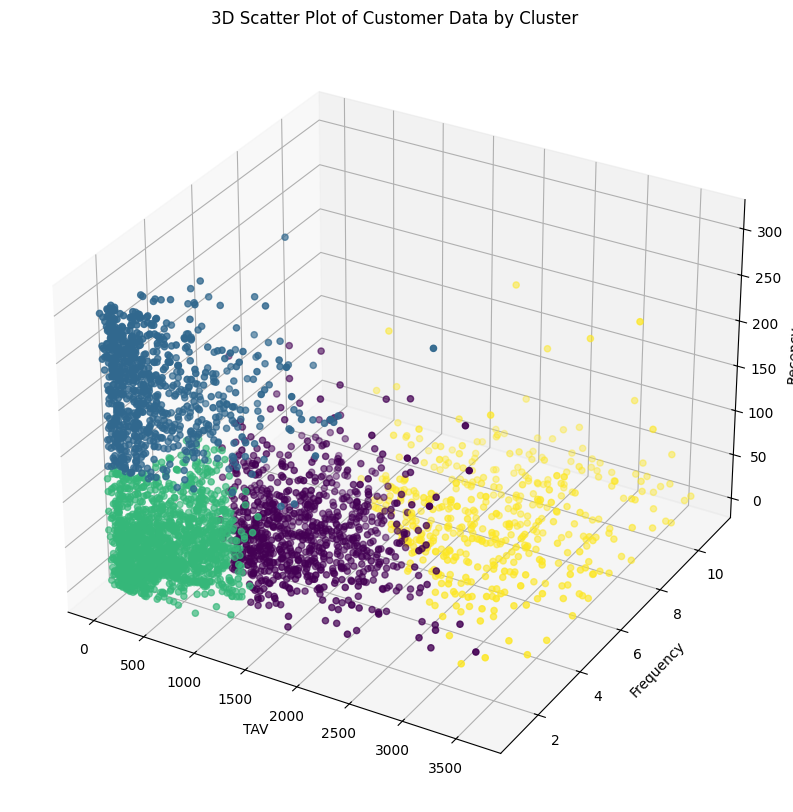

In [50]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(df_non_outlier['TAV'],
                     df_non_outlier['Frequency'],
                     df_non_outlier['recency'],
                     c=df_non_outlier['cluster'],
                     marker='o')

ax.set_xlabel('TAV')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

Text(0, 0.5, 'Recency')

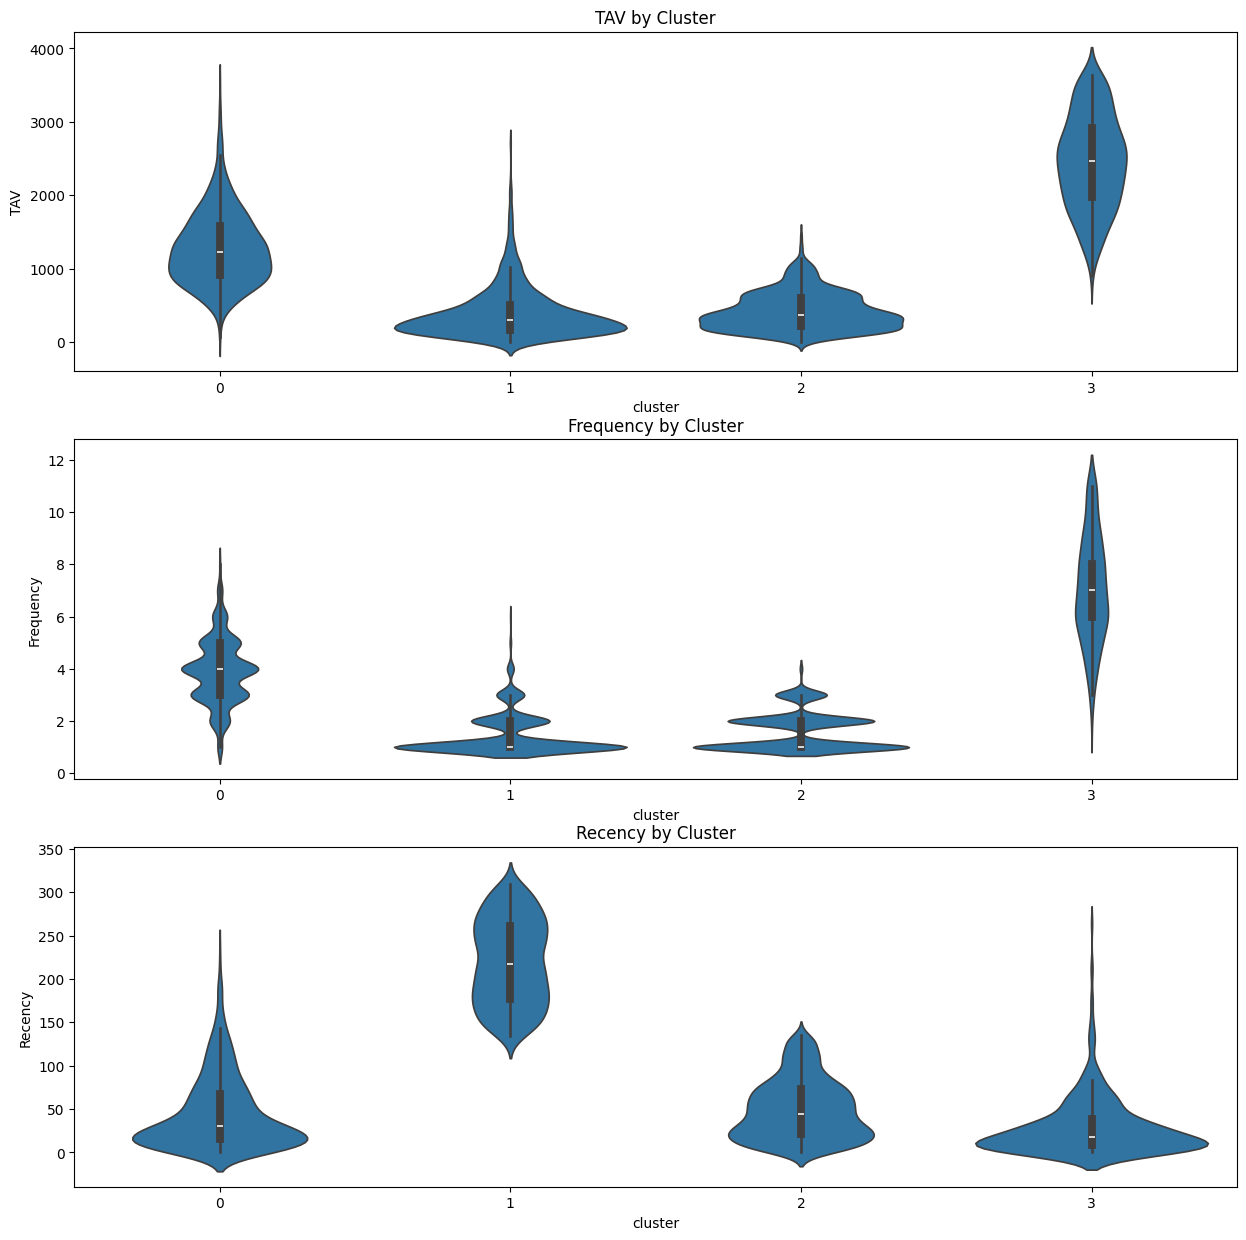

In [51]:
# Plot clusters to compare across each of the three features

plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.violinplot(x=df_non_outlier['cluster'], y=df_non_outlier['TAV'])
plt.title('TAV by Cluster')
plt.ylabel('TAV')

plt.subplot(3, 1, 2)
sns.violinplot(x=df_non_outlier['cluster'], y=df_non_outlier['Frequency'])
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=df_non_outlier['cluster'], y=df_non_outlier['recency'])
plt.title('Recency by Cluster')
plt.ylabel('Recency')

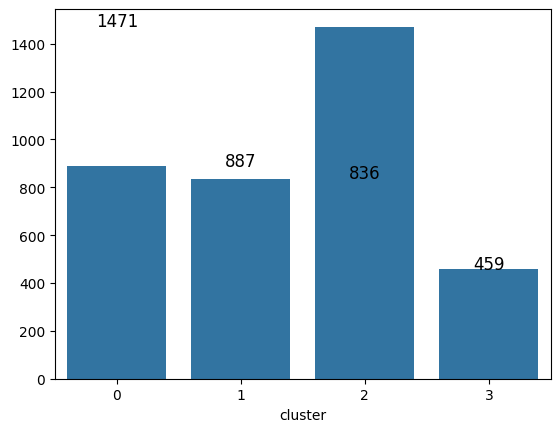

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bar plot
ax = sns.barplot(x=df_non_outlier['cluster'].value_counts().index,
                 y=df_non_outlier['cluster'].value_counts().values)

# Add data labels
for i, value in enumerate(df_non_outlier['cluster'].value_counts().values):
    ax.text(i, value + 1, str(value), ha='center', fontsize=12, color='black')

# Show plot
plt.show()

## __Recommendations__
- Cluster 3 – REWARD: These are the most engaged customers, making frequent and recent purchases with the highest annual spend. They represent the brand’s most loyal and valuable customer base.
  - Recommendation: Encourage referrals through bonuses or rewards. Enhance their brand experience with exclusive access or VIP events.
- Cluster 0 – UPSELL: Customers here have recent purchases at moderate frequency and high annual spending. They are engaged but could be nudged to increase spending per transaction.
  - Recommendation: Offer complementary or premium products to enhance their purchase value. Introduce add-ons or subscriptions to improve their spending habits.
- Cluster 2 – RETAIN: These customers have made recent purchases at a moderate frequency. They are consistent spenders with potential for long-term loyalty.
  - Recommendation: Strengthen customer engagement by implementing loyalty rewards and personalized incentives.
- Cluster 1 – RE-ENGAGE: This segment includes customers who purchased long ago with low frequency and low annual spend. They are at risk of churning and require a reason to return.
  - Recommendation: Reconnect with them during key events when they may be more likely to make another purchase. Use personalized communication and promotions to reignite interest.
